In [17]:
import scanpy as sc

### Read in adata

In [18]:
adata = sc.read_h5ad('/home/workspace/private/combined_data_0020226.h5ad')

### Assess the distribution of by markers (cell count x intensity)

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse

def plot_marker_distributions(adata, bins=100, figsize_per_marker=(5, 3)):
    """
    Plot distribution for each marker: intensity on x-axis, cell count on y-axis.
    
    Parameters:
    -----------
    adata : AnnData
        AnnData object with intensity data
    bins : int
        Number of bins for histogram (default: 100)
    figsize_per_marker : tuple
        Size of each subplot (default: (5, 3))
    """
    
    # Get data
    if sparse.issparse(adata.X):
        X_data = adata.X.toarray()
    else:
        X_data = adata.X
    
    marker_names = adata.var['marker_name'].values
    n_markers = len(marker_names)
    
    # Calculate grid dimensions
    n_cols = 4
    n_rows = int(np.ceil(n_markers / n_cols))
    
    # Create figure
    fig, axes = plt.subplots(n_rows, n_cols, 
                             figsize=(figsize_per_marker[0] * n_cols, 
                                     figsize_per_marker[1] * n_rows))
    axes = axes.flatten()
    
    print(f"Creating distribution plots for {n_markers} markers...")
    
    for idx, marker in enumerate(marker_names):
        ax = axes[idx]
        data = X_data[:, idx]
        
        # Remove NaN values for plotting
        valid_data = data[~np.isnan(data)]
        
        if len(valid_data) == 0:
            ax.text(0.5, 0.5, 'No valid data', 
                   ha='center', va='center', transform=ax.transAxes)
            ax.set_title(marker, fontsize=10, fontweight='bold')
            continue
        
        # Calculate statistics
        mean_val = np.mean(valid_data)
        median_val = np.median(valid_data)
        max_val = np.max(valid_data)
        
        # Plot histogram
        counts, bin_edges, patches = ax.hist(valid_data, bins=bins, 
                                             color='steelblue', alpha=0.7, 
                                             edgecolor='black', linewidth=0.5)
        
        # Add vertical lines for statistics
        ax.axvline(median_val, color='red', linestyle='--', 
                  linewidth=2, label=f'Median: {median_val:.1f}', alpha=0.7)
        ax.axvline(mean_val, color='orange', linestyle='--', 
                  linewidth=2, label=f'Mean: {mean_val:.1f}', alpha=0.7)
        
        # Formatting
        ax.set_xlabel('Intensity', fontsize=9)
        ax.set_ylabel('Number of Cells', fontsize=9)
        ax.set_title(marker, fontsize=10, fontweight='bold')
        ax.legend(fontsize=7, loc='upper right')
        ax.grid(True, alpha=0.3)
        ax.tick_params(labelsize=8)
        
        # Add stats box
        n_cells = len(valid_data)
        n_nan = len(data) - len(valid_data)
        stats_text = f'n={n_cells:,}'
        if n_nan > 0:
            stats_text += f'\nNaN={n_nan:,}'
        stats_text += f'\nMax={max_val:.1f}'
        
        ax.text(0.98, 0.98, stats_text, 
               transform=ax.transAxes, fontsize=7,
               verticalalignment='top', horizontalalignment='right',
               bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    # Hide unused subplots
    for idx in range(n_markers, len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.savefig('marker_distributions_all.png', dpi=300, bbox_inches='tight')
    print("✓ Saved: marker_distributions_all.png")
    plt.show()


def plot_marker_distributions_log_scale(adata, bins=100, figsize_per_marker=(5, 3)):
    """
    Same as above but with log scale on y-axis to better see tail of distribution.
    """
    
    # Get data
    if sparse.issparse(adata.X):
        X_data = adata.X.toarray()
    else:
        X_data = adata.X
    
    marker_names = adata.var['marker_name'].values
    n_markers = len(marker_names)
    
    # Calculate grid dimensions
    n_cols = 4
    n_rows = int(np.ceil(n_markers / n_cols))
    
    # Create figure
    fig, axes = plt.subplots(n_rows, n_cols, 
                             figsize=(figsize_per_marker[0] * n_cols, 
                                     figsize_per_marker[1] * n_rows))
    axes = axes.flatten()
    
    print(f"Creating log-scale distribution plots for {n_markers} markers...")
    
    for idx, marker in enumerate(marker_names):
        ax = axes[idx]
        data = X_data[:, idx]
        
        # Remove NaN values for plotting
        valid_data = data[~np.isnan(data)]
        
        if len(valid_data) == 0:
            ax.text(0.5, 0.5, 'No valid data', 
                   ha='center', va='center', transform=ax.transAxes)
            ax.set_title(marker, fontsize=10, fontweight='bold')
            continue
        
        # Calculate statistics
        median_val = np.median(valid_data)
        p95 = np.percentile(valid_data, 95)
        p99 = np.percentile(valid_data, 99)
        max_val = np.max(valid_data)
        
        # Plot histogram
        counts, bin_edges, patches = ax.hist(valid_data, bins=bins, 
                                             color='steelblue', alpha=0.7, 
                                             edgecolor='black', linewidth=0.5)
        
        # Add vertical lines for percentiles
        ax.axvline(median_val, color='green', linestyle='--', 
                  linewidth=1.5, label=f'Median: {median_val:.1f}', alpha=0.7)
        ax.axvline(p95, color='orange', linestyle='--', 
                  linewidth=1.5, label=f'P95: {p95:.1f}', alpha=0.7)
        ax.axvline(p99, color='red', linestyle='--', 
                  linewidth=1.5, label=f'P99: {p99:.1f}', alpha=0.7)
        
        # Set log scale
        ax.set_yscale('log')
        
        # Formatting
        ax.set_xlabel('Intensity', fontsize=9)
        ax.set_ylabel('Number of Cells (log scale)', fontsize=9)
        ax.set_title(marker, fontsize=10, fontweight='bold')
        ax.legend(fontsize=6, loc='upper right')
        ax.grid(True, alpha=0.3, which='both')
        ax.tick_params(labelsize=8)
    
    # Hide unused subplots
    for idx in range(n_markers, len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.savefig('marker_distributions_log_scale.png', dpi=300, bbox_inches='tight')
    print("✓ Saved: marker_distributions_log_scale.png")
    plt.show()


def plot_single_marker_detailed(adata, marker_name):
    """
    Detailed plot for a single marker with both linear and log scale.
    """
    
    # Get data
    if sparse.issparse(adata.X):
        X_data = adata.X.toarray()
    else:
        X_data = adata.X
    
    marker_names = adata.var['marker_name'].values
    
    if marker_name not in marker_names:
        print(f"Error: Marker '{marker_name}' not found")
        return
    
    marker_idx = list(marker_names).index(marker_name)
    data = X_data[:, marker_idx]
    valid_data = data[~np.isnan(data)]
    
    # Calculate statistics
    mean_val = np.mean(valid_data)
    median_val = np.median(valid_data)
    std_val = np.std(valid_data)
    min_val = np.min(valid_data)
    max_val = np.max(valid_data)
    p95 = np.percentile(valid_data, 95)
    p99 = np.percentile(valid_data, 99)
    p999 = np.percentile(valid_data, 99.9)
    
    # Create figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    # Linear scale
    ax1.hist(valid_data, bins=100, color='steelblue', alpha=0.7, edgecolor='black')
    ax1.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.1f}')
    ax1.axvline(mean_val, color='orange', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.1f}')
    ax1.axvline(p95, color='orange', linestyle=':', linewidth=2, label=f'P95: {p95:.1f}')
    ax1.axvline(p99, color='red', linestyle=':', linewidth=2, label=f'P99: {p99:.1f}')
    ax1.axvline(p999, color='darkred', linestyle=':', linewidth=2, label=f'P99.9: {p999:.1f}')
    
    ax1.set_xlabel('Intensity', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Number of Cells', fontsize=12, fontweight='bold')
    ax1.set_title(f'{marker_name} - Linear Scale', fontsize=14, fontweight='bold')
    ax1.legend(fontsize=10)
    ax1.grid(True, alpha=0.3)
    
    # Log scale
    ax2.hist(valid_data, bins=100, color='steelblue', alpha=0.7, edgecolor='black')
    ax2.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.1f}')
    ax2.axvline(mean_val, color='orange', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.1f}')
    ax2.axvline(p95, color='orange', linestyle=':', linewidth=2, label=f'P95: {p95:.1f}')
    ax2.axvline(p99, color='red', linestyle=':', linewidth=2, label=f'P99: {p99:.1f}')
    ax2.axvline(p999, color='darkred', linestyle=':', linewidth=2, label=f'P99.9: {p999:.1f}')
    
    ax2.set_xlabel('Intensity', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Number of Cells (log scale)', fontsize=12, fontweight='bold')
    ax2.set_title(f'{marker_name} - Log Scale', fontsize=14, fontweight='bold')
    ax2.set_yscale('log')
    ax2.legend(fontsize=10)
    ax2.grid(True, alpha=0.3, which='both')
    
    # Stats box
    stats_text = (f'Statistics:\n'
                 f'n = {len(valid_data):,}\n'
                 f'Min = {min_val:.2f}\n'
                 f'Max = {max_val:.2f}\n'
                 f'Mean = {mean_val:.2f}\n'
                 f'Median = {median_val:.2f}\n'
                 f'Std = {std_val:.2f}\n'
                 f'P95 = {p95:.2f}\n'
                 f'P99 = {p99:.2f}\n'
                 f'P99.9 = {p999:.2f}')
    
    fig.text(0.02, 0.98, stats_text, transform=fig.transFigure,
            fontsize=9, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    plt.tight_layout(rect=[0.12, 0, 1, 1])
    plt.savefig(f'distribution_{marker_name}.png', dpi=300, bbox_inches='tight')
    print(f"✓ Saved: distribution_{marker_name}.png")
    plt.show()

'''
# Usage:

# Plot all markers (linear scale)
plot_marker_distributions(adata, bins=100)

# Plot all markers (log scale - better for seeing tails)
plot_marker_distributions_log_scale(adata, bins=100)

# Plot single marker in detail
plot_single_marker_detailed(adata, 'CD3d-EP4426AF647')
plot_single_marker_detailed(adata, 'CD452B11PD726AF750')

'''

"\n# Usage:\n\n# Plot all markers (linear scale)\nplot_marker_distributions(adata, bins=100)\n\n# Plot all markers (log scale - better for seeing tails)\nplot_marker_distributions_log_scale(adata, bins=100)\n\n# Plot single marker in detail\nplot_single_marker_detailed(adata, 'CD3d-EP4426AF647')\nplot_single_marker_detailed(adata, 'CD452B11PD726AF750')\n\n"

Creating distribution plots for 53 markers...
✓ Saved: marker_distributions_all.png


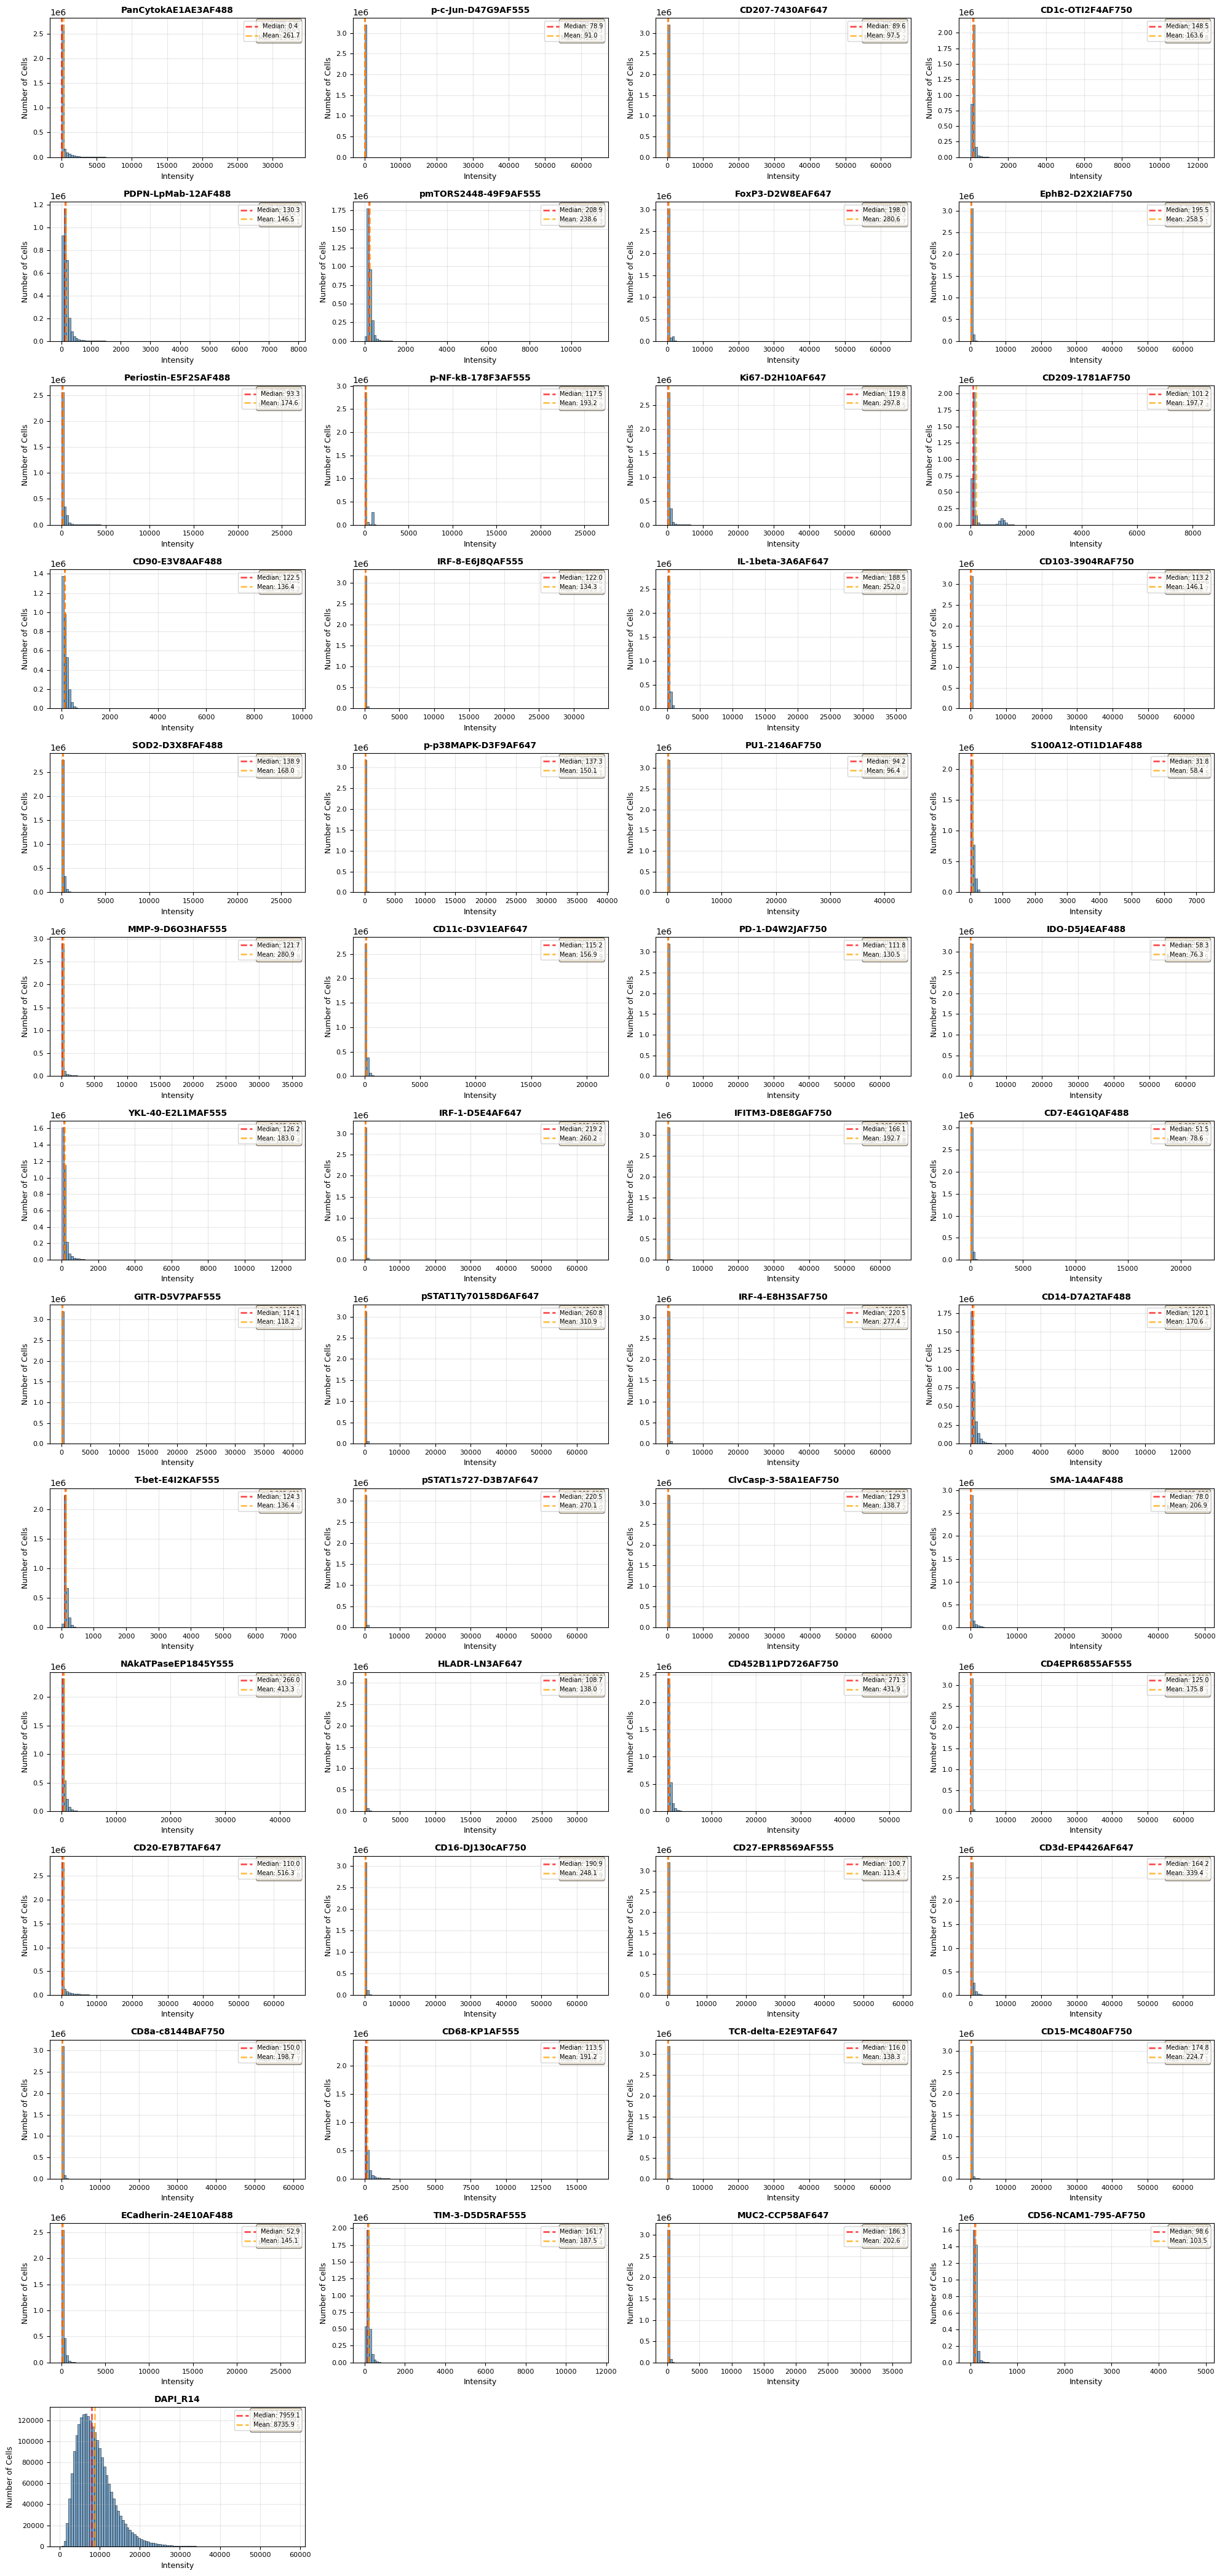

In [20]:
plot_marker_distributions(adata, bins=100)

### Remove data that reaches the detector limit (the max intensity value)

In [21]:
import numpy as np
from scipy import sparse

def remove_max_intensity_values(adata, inplace=True):
    """
    Remove (set to NaN) all measurements that are at the maximum intensity 
    for each marker. This removes detector-saturated values.
    
    Parameters:
    -----------
    adata : AnnData
        AnnData object with intensity data
    inplace : bool
        If True, modifies adata in place; if False, returns a copy
    
    Returns:
    --------
    If inplace=True: statistics dictionary
    If inplace=False: (modified adata, statistics dictionary)
    """
    
    if not inplace:
        adata = adata.copy()
    
    # Get data
    if sparse.issparse(adata.X):
        X_data = adata.X.toarray()
    else:
        X_data = adata.X.copy()
    
    marker_names = adata.var['marker_name'].values
    
    removal_stats = {
        'by_marker': {},
        'total_removed': 0
    }
    
    print("="*80)
    print("REMOVING MAXIMUM INTENSITY VALUES (DETECTOR SATURATION)")
    print("="*80)
    print(f"Strategy: Set all values at max intensity to NaN for each marker\n")
    
    for idx, marker in enumerate(marker_names):
        marker_intensity = X_data[:, idx]
        
        # Find maximum value (ignoring existing NaN)
        valid_data = marker_intensity[~np.isnan(marker_intensity)]
        
        if len(valid_data) == 0:
            print(f"⊘ Skipping {marker}: no valid data")
            continue
        
        max_val = np.max(valid_data)
        
        # Find cells at max value
        at_max_mask = marker_intensity == max_val
        n_at_max = np.sum(at_max_mask)
        
        if n_at_max > 0:
            pct_at_max = 100 * n_at_max / len(marker_intensity)
            
            # Set to NaN
            X_data[at_max_mask, idx] = np.nan
            
            # Calculate new max after removal
            remaining_data = marker_intensity[~at_max_mask]
            remaining_data = remaining_data[~np.isnan(remaining_data)]
            new_max = np.max(remaining_data) if len(remaining_data) > 0 else np.nan
            
            removal_stats['by_marker'][marker] = {
                'old_max': max_val,
                'new_max': new_max,
                'n_removed': n_at_max,
                'pct_removed': pct_at_max,
                'n_remaining': len(remaining_data)
            }
            removal_stats['total_removed'] += n_at_max
            
            print(f"{marker}:")
            print(f"  Max value: {max_val:.2f}")
            print(f"  Removed: {n_at_max:,} cells ({pct_at_max:.3f}%)")
            print(f"  New max: {new_max:.2f}")
            print(f"  Remaining valid: {len(remaining_data):,}")
        else:
            print(f"✓ {marker}: no cells at max value")
    
    # Update adata.X
    adata.X = X_data
    
    # Also update layers
    for layer in ['intensity_mean', 'intensity_median', 'intensity_std']:
        if layer in adata.layers:
            layer_data = adata.layers[layer]
            if sparse.issparse(layer_data):
                layer_data = layer_data.toarray()
            else:
                layer_data = layer_data.copy()
            
            for marker, stats in removal_stats['by_marker'].items():
                marker_idx = list(marker_names).index(marker)
                old_max = stats['old_max']
                at_max_mask = layer_data[:, marker_idx] == old_max
                layer_data[at_max_mask, marker_idx] = np.nan
            
            adata.layers[layer] = layer_data
            print(f"✓ Updated layer: {layer}")
    
    # Summary
    total_measurements = adata.n_obs * adata.n_vars
    print(f"\n{'='*80}")
    print("REMOVAL SUMMARY")
    print("="*80)
    print(f"Markers affected: {len(removal_stats['by_marker'])} / {len(marker_names)}")
    print(f"Total measurements removed: {removal_stats['total_removed']:,}")
    print(f"Percentage of dataset: {100*removal_stats['total_removed']/total_measurements:.4f}%")
    
    if not inplace:
        return adata, removal_stats
    return removal_stats


def remove_top_n_intensity_values(adata, n_values=1, inplace=True):
    """
    Remove the top N unique intensity values for each marker.
    Useful if saturation creates multiple pile-up points.
    
    Parameters:
    -----------
    adata : AnnData
    n_values : int
        Number of top unique intensity values to remove (default: 1)
    inplace : bool
        If True, modifies adata in place
    
    Returns:
    --------
    If inplace=True: statistics dictionary
    If inplace=False: (modified adata, statistics dictionary)
    """
    
    if not inplace:
        adata = adata.copy()
    
    # Get data
    if sparse.issparse(adata.X):
        X_data = adata.X.toarray()
    else:
        X_data = adata.X.copy()
    
    marker_names = adata.var['marker_name'].values
    
    removal_stats = {
        'by_marker': {},
        'total_removed': 0
    }
    
    print("="*80)
    print(f"REMOVING TOP {n_values} UNIQUE INTENSITY VALUE(S)")
    print("="*80)
    
    for idx, marker in enumerate(marker_names):
        marker_intensity = X_data[:, idx]
        
        # Get unique values (excluding NaN)
        valid_data = marker_intensity[~np.isnan(marker_intensity)]
        
        if len(valid_data) == 0:
            print(f"⊘ Skipping {marker}: no valid data")
            continue
        
        # Get top N unique values
        unique_values = np.unique(valid_data)
        if len(unique_values) <= n_values:
            print(f"⚠️  {marker}: only {len(unique_values)} unique values, skipping")
            continue
        
        top_n_values = np.sort(unique_values)[-n_values:]
        
        # Remove cells with these values
        remove_mask = np.isin(marker_intensity, top_n_values)
        n_removed = np.sum(remove_mask)
        
        if n_removed > 0:
            pct_removed = 100 * n_removed / len(marker_intensity)
            
            # Set to NaN
            X_data[remove_mask, idx] = np.nan
            
            # New max
            remaining_data = marker_intensity[~remove_mask]
            remaining_data = remaining_data[~np.isnan(remaining_data)]
            new_max = np.max(remaining_data) if len(remaining_data) > 0 else np.nan
            
            removal_stats['by_marker'][marker] = {
                'removed_values': top_n_values.tolist(),
                'new_max': new_max,
                'n_removed': n_removed,
                'pct_removed': pct_removed
            }
            removal_stats['total_removed'] += n_removed
            
            print(f"{marker}:")
            print(f"  Removed values: {top_n_values}")
            print(f"  Cells removed: {n_removed:,} ({pct_removed:.3f}%)")
            print(f"  New max: {new_max:.2f}")
    
    # Update adata
    adata.X = X_data
    
    # Update layers
    for layer in ['intensity_mean', 'intensity_median', 'intensity_std']:
        if layer in adata.layers:
            layer_data = adata.layers[layer]
            if sparse.issparse(layer_data):
                layer_data = layer_data.toarray()
            else:
                layer_data = layer_data.copy()
            
            for marker, stats in removal_stats['by_marker'].items():
                marker_idx = list(marker_names).index(marker)
                removed_values = stats['removed_values']
                remove_mask = np.isin(layer_data[:, marker_idx], removed_values)
                layer_data[remove_mask, marker_idx] = np.nan
            
            adata.layers[layer] = layer_data
    
    total_measurements = adata.n_obs * adata.n_vars
    print(f"\n{'='*80}")
    print("REMOVAL SUMMARY")
    print("="*80)
    print(f"Markers affected: {len(removal_stats['by_marker'])} / {len(marker_names)}")
    print(f"Total measurements removed: {removal_stats['total_removed']:,}")
    print(f"Percentage of dataset: {100*removal_stats['total_removed']/total_measurements:.4f}%")
    
    if not inplace:
        return adata, removal_stats
    return removal_stats

In [22]:
removal_stats = remove_max_intensity_values(adata, inplace=True)

# After removal, check the results
from scipy import sparse
X_data = adata.X.toarray() if sparse.issparse(adata.X) else adata.X
print("\n" + "="*80)
print("POST-REMOVAL CHECK")
print("="*80)
for idx, marker in enumerate(adata.var['marker_name'].values):
    data = X_data[:, idx]
    valid = data[~np.isnan(data)]
    n_nan = np.sum(np.isnan(data))
    if len(valid) > 0:
        print(f"{marker}: max={np.max(valid):.2f}, NaNs={n_nan:,}")

REMOVING MAXIMUM INTENSITY VALUES (DETECTOR SATURATION)
Strategy: Set all values at max intensity to NaN for each marker

PanCytokAE1AE3AF488:
  Max value: 32942.82
  Removed: 1 cells (0.000%)
  New max: 27712.55
  Remaining valid: 3,205,625
p-c-Jun-D47G9AF555:
  Max value: 64218.33
  Removed: 1 cells (0.000%)
  New max: 64194.88
  Remaining valid: 3,205,625
CD207-7430AF647:
  Max value: 65184.20
  Removed: 1 cells (0.000%)
  New max: 65144.64
  Remaining valid: 3,205,625
CD1c-OTI2F4AF750:
  Max value: 12238.82
  Removed: 1 cells (0.000%)
  New max: 11492.72
  Remaining valid: 3,205,625
PDPN-LpMab-12AF488:
  Max value: 7828.11
  Removed: 1 cells (0.000%)
  New max: 6921.34
  Remaining valid: 3,205,625
pmTORS2448-49F9AF555:
  Max value: 11220.32
  Removed: 1 cells (0.000%)
  New max: 9420.05
  Remaining valid: 3,205,625
FoxP3-D2W8EAF647:
  Max value: 65340.69
  Removed: 1 cells (0.000%)
  New max: 65289.82
  Remaining valid: 3,205,625
EphB2-D2X2IAF750:
  Max value: 65514.11
  Removed: 1

In [23]:
def remove_max_intensity_values(adata, inplace=True):
    """
    Remove all cells that have the maximum intensity value for any marker.
    This removes ALL cells at max, not just one cell per marker.
    """
    import numpy as np
    from scipy import sparse
    
    # Get the data
    X_data = adata.X.toarray() if sparse.issparse(adata.X) else adata.X
    
    # Track which cells to remove
    cells_to_remove = np.zeros(adata.n_obs, dtype=bool)
    
    removal_stats = {}
    
    for idx, marker in enumerate(adata.var['marker_name'].values):
        marker_data = X_data[:, idx]
        
        # Get max value (ignoring NaN)
        valid_data = marker_data[~np.isnan(marker_data)]
        if len(valid_data) == 0:
            continue
            
        max_val = np.max(valid_data)
        
        # Find ALL cells with this max value
        cells_at_max = (marker_data == max_val)
        n_cells_at_max = np.sum(cells_at_max)
        
        # Mark these cells for removal
        cells_to_remove = cells_to_remove | cells_at_max
        
        removal_stats[marker] = {
            'max_value': max_val,
            'n_cells_removed': n_cells_at_max
        }
        
        print(f"{marker}: max={max_val:.2f}, removing {n_cells_at_max} cells")
    
    # Count total unique cells to remove
    n_total_removed = np.sum(cells_to_remove)
    print(f"\nTotal cells before: {adata.n_obs}")
    print(f"Total cells to remove: {n_total_removed}")
    print(f"Total cells after: {adata.n_obs - n_total_removed}")
    
    # Remove cells
    if inplace:
        adata._inplace_subset_obs(~cells_to_remove)
    else:
        adata = adata[~cells_to_remove, :].copy()
    
    return removal_stats

# Usage
removal_stats = remove_max_intensity_values(adata, inplace=True)

PanCytokAE1AE3AF488: max=27712.55, removing 1 cells
p-c-Jun-D47G9AF555: max=64194.88, removing 1 cells
CD207-7430AF647: max=65144.64, removing 1 cells
CD1c-OTI2F4AF750: max=11492.72, removing 1 cells
PDPN-LpMab-12AF488: max=6921.34, removing 1 cells
pmTORS2448-49F9AF555: max=9420.05, removing 1 cells
FoxP3-D2W8EAF647: max=65289.82, removing 1 cells
EphB2-D2X2IAF750: max=65512.66, removing 1 cells
Periostin-E5F2SAF488: max=18863.95, removing 1 cells
p-NF-kB-178F3AF555: max=21088.11, removing 1 cells
Ki67-D2H10AF647: max=48824.81, removing 1 cells
CD209-1781AF750: max=6915.60, removing 1 cells
CD90-E3V8AAF488: max=7682.63, removing 1 cells
IRF-8-E6J8QAF555: max=23088.28, removing 1 cells
IL-1beta-3A6AF647: max=32322.67, removing 1 cells
CD103-3904RAF750: max=63604.69, removing 1 cells
SOD2-D3X8FAF488: max=21600.44, removing 1 cells
p-p38MAPK-D3F9AF647: max=34388.97, removing 1 cells
PU1-2146AF750: max=20215.36, removing 1 cells
S100A12-OTI1D1AF488: max=5935.23, removing 1 cells
MMP-9-D6O

In [24]:
adata

AnnData object with n_obs × n_vars = 3205576 × 53
    obs: 'cell_id', 'sample_id', 'Timeframe', 'batch_id', 'x', 'y', 'Outline Area (µm²)', 'Perimeter (µm)', 'Circularity'
    var: 'marker_name'
    layers: 'intensity_mean', 'intensity_median', 'intensity_std'

In [25]:
adata.write('adata_02022026_postfilter.h5ad')